In [1]:
import numpy as np 
import pandas as pd 
import re

In [2]:
class WordPieceTokenizer:
    
    """
    Initialisation: 
    1. Create a dictionary to store vocab and another to store freq
    2. Define vocab size
    """
    def __init__(self, vocab_size : int):
        
        self.vocab = []
        self.word_freq = {}
        self.vocab_size = vocab_size
    
    """
    Preprocessing: 
    1. Convert to lower case
    2. Split into words & remove spaces
    3. Remove numbers & non-alphabetic chars like ",", ".", "!" etc. 
    4. Returns an array of strings
    """
    def preprocess_data(self, text: str):
        
        text = text.lower()
        text = re.sub(r"[^a-zA-Z\s]", "", text) #replacing characters using RegEx
        return text.split()
    
    """
    Vocab Construction: 
    1. Preprocess the data and store in dict the frequency of every word/token
    2. Create alphabets from the  by splitting each word into letters
    3. Create splits for every word i.e. storing letters of each word in a dictionary
    4. 
    """
    def construct_vocabulary(self, corpus: list):
        
        # store word frequencies
        for sentence in corpus:
            tokens = self.preprocess_data(sentence)
            
            for token in tokens:
                self.word_freq[token] = self.word_freq.get(token, 0) + 1
                
        # create alphabet and splits
        alphabet = [] #unique morphemes stored
        splits = {}
        for word in self.word_freq.keys():
            if word[0] not in alphabet:
                alphabet.append(word[0])
            
            for remaining_letter in word[1:]:
                if f"##{remaining_letter}" not in alphabet:
                    alphabet.append(f"##{remaining_letter}")

            splits[word] = [c if i == 0 else f"##{c}" for i, c in enumerate(word)]
            
        alphabet.sort()
        
        self.vocab = ["[PAD]", "[UNK]"] + alphabet.copy() # adding two special tokens to vocab
        
        # compute scores for pairs
        # merge pair
        """Deplag needed"""
        while len(self.vocab) < self.vocab_size:
            scores = self.compute_pair_scores(splits)
            best_pair, max_score = "", None
            for pair, score in scores.items():
                if max_score is None or max_score < score:
                    best_pair = pair
                    max_score = score
            splits = self.merge_pair(*best_pair, splits)
            new_token = (
                best_pair[0] + best_pair[1][2:]
                if best_pair[1].startswith("##")
                else best_pair[0] + best_pair[1]
            )
            self.vocab.append(new_token)
        
        self.save_vocabulary()
            
    """Deplag needed"""
    def tokenize(self, text: str):
        pre_tokenized_text = self.preprocess_data(text)
        encoded_words = [self.encode_word(word) for word in pre_tokenized_text]
        return sum(encoded_words, [])
    
    
    #____________Helper Methods____________
    
    def save_vocabulary(self):
        vocab_file = f"vocabulary_86.txt"
        with open(vocab_file, "w") as f:
            for token in self.vocab:
                f.write(f"{token}\n")
    
    
    """Deplag needed"""
    def compute_pair_scores(self, splits):
        letter_freqs = {}
        pair_freqs = {}
        for word, freq in self.word_freq.items():
            split = splits[word]
            if len(split) == 1:
                letter_freqs[split[0]] = letter_freqs.get(split[0], 0) + freq
                continue
            for i in range(len(split) - 1):
                pair = (split[i], split[i + 1]) 
                letter_freqs[split[i]] = letter_freqs.get(split[i], 0) + freq
                pair_freqs[pair] = pair_freqs.get(pair, 0) + freq
            letter_freqs[split[-1]] = letter_freqs.get(split[-1], 0) + freq

        scores = {
            pair: freq / (letter_freqs[pair[0]] * letter_freqs[pair[1]])
            for pair, freq in pair_freqs.items()
        }
        return scores
    
    
    """Deplag needed"""
    def merge_pair(self, a, b, splits):
        for word in self.word_freq:
            split = splits[word]
            if len(split) == 1:
                continue
            i = 0
            while i < len(split) - 1:
                if split[i] == a and split[i + 1] == b:
                    merge = a + b[2:] if b.startswith("##") else a + b
                    split = split[:i] + [merge] + split[i + 2 :]
                else:
                    i += 1
            splits[word] = split
        return splits
    
    
    """Deplag needed"""
    def encode_word(self, word):
        tokens = []
        while len(word) > 0:
            i = len(word)
            while i > 0 and word[:i] not in self.vocab:
                i -= 1
            if i == 0:
                return ["[UNK]"]
            tokens.append(word[:i])
            word = word[i:]
            if len(word) > 0:
                word = f"##{word}"
        return tokens

In [5]:
import json

corpus = []
with open("corpus.txt", 'r') as file: 
    text = file.read()
    sentences = text.split()
    for sentence in sentences: 
        sentence = sentence.strip()
        if sentence:
            corpus.append(sentence)

tokenizer = WordPieceTokenizer(vocab_size=100)

tokenizer.construct_vocabulary(corpus)
vocab = tokenizer.vocab

output_json_path = 'tokenized_data.json'  # Path to save tokenized output

# Prepare a dictionary to store the tokenized sentences
tokenized_data = {}

In [7]:
tokenized_data = {}
with open("corpus.txt", 'r') as file: 
    text = file.read()
    sentences = text.split('\n')
    sentence_id = 0
    for sentence in sentences: 
        sentence = sentence.strip() 
        if sentence:
            tokens = tokenizer.tokenize(sentence)
            tokenized_data[sentence_id] = tokens
            sentence_id += 1

# Write the tokenized data to the output JSON file
with open(output_json_path, 'w') as f:
    json.dump(tokenized_data, f, indent=4)

Epoch [1/170], Loss: 8.6054
Epoch [2/170], Loss: 7.0786
Epoch [3/170], Loss: 5.6956
Epoch [4/170], Loss: 5.1681
Epoch [5/170], Loss: 5.0357
Epoch [6/170], Loss: 4.9546
Epoch [7/170], Loss: 4.8921
Epoch [8/170], Loss: 4.8333
Epoch [9/170], Loss: 4.7672
Epoch [10/170], Loss: 4.7135
Epoch [11/170], Loss: 4.6590
Epoch [12/170], Loss: 4.6030
Epoch [13/170], Loss: 4.5538
Epoch [14/170], Loss: 4.4944
Epoch [15/170], Loss: 4.4469
Epoch [16/170], Loss: 4.4014
Epoch [17/170], Loss: 4.3544
Epoch [18/170], Loss: 4.3131
Epoch [19/170], Loss: 4.2699
Epoch [20/170], Loss: 4.2311
Epoch [21/170], Loss: 4.1948
Epoch [22/170], Loss: 4.1519
Epoch [23/170], Loss: 4.1148
Epoch [24/170], Loss: 4.0873
Epoch [25/170], Loss: 4.0464
Epoch [26/170], Loss: 4.0158
Epoch [27/170], Loss: 3.9799
Epoch [28/170], Loss: 3.9467
Epoch [29/170], Loss: 3.9173
Epoch [30/170], Loss: 3.8854
Epoch [31/170], Loss: 3.8589
Epoch [32/170], Loss: 3.8284
Epoch [33/170], Loss: 3.7979
Epoch [34/170], Loss: 3.7710
Epoch [35/170], Loss: 3

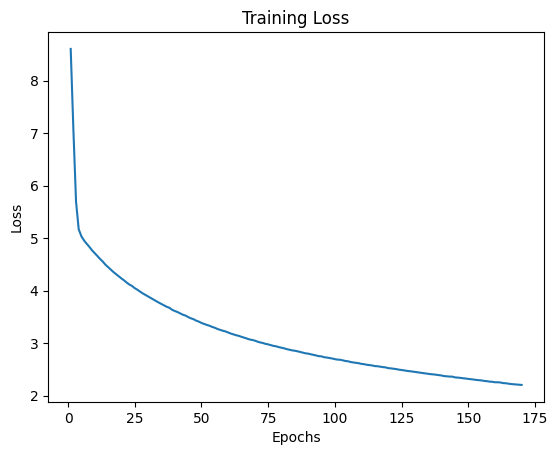

Word: [PAD]
Similar: ['vibrati', 'sudd', '##nu']
Dissimilar: sephora

Word: [UNK]
Similar: ['##suma', '##ativi', 'mooshi']
Dissimilar: campaign

Word: ##a
Similar: ['##ntity', 'stopp', 'start']
Dissimilar: mainta

Word: ##b
Similar: ['disappr', 'india', '##ndow']
Dissimilar: devestat

Word: ##c
Similar: ['##ory', '##ato', 'warmth']
Dissimilar: ##sibl

Word: ##d
Similar: ['actual', '##anag', 'gree']
Dissimilar: ##ttl

Word: ##e
Similar: ['##ecom', 'convention', 'lightning']
Dissimilar: ##tain

Word: ##f
Similar: ['exclusiv', 'overw', 'lurk']
Dissimilar: individually

Word: ##g
Similar: ['arous', 'disabiliti', '##gs']
Dissimilar: orgas

Word: ##h
Similar: ['##thday', '##ali', 'trial']
Dissimilar: ##isman

Word: ##i
Similar: ['complac', 'liv', '##ar']
Dissimilar: afa

Word: ##j
Similar: ['##sk', '##iday', 'natura']
Dissimilar: suffe

Word: ##k
Similar: ['##dding', 'communicat', 'exspr']
Dissimilar: buil

Word: ##l
Similar: ['dogs', 'happin', '##ling']
Dissimilar: ##op

Word: ##m
Similar: 

In [7]:
# in this file, training a CBOW-based Word2Vec model using a corpus of tokenized words and a vocabulary. The model learns word embeddings and outputs training loss while plotting it.

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt
import json

# Word2VecDataset for CBOW
import torch.nn.functional as F

class Word2VecDataset(Dataset):
    def __init__(self, corpus, context_window, word_to_idx, idx_to_word):
        self.context_window = context_window
        self.word_to_idx = word_to_idx
        self.idx_to_word = idx_to_word
        self.max_context_size = 2 * context_window
        self.data = self.preprocess_data(corpus)

    def preprocess_data(self, corpus):
        data = []
        for key in corpus:
            tokens = corpus[key]
            for i in range(len(tokens)):
                target = tokens[i]
                context = tokens[max(0, i - self.context_window):i] + tokens[i + 1:i + 1 + self.context_window]
                target_idx = self.word_to_idx[target]
                context_idx = [self.word_to_idx[word] for word in context if word in self.word_to_idx]

                if context_idx:
                    data.append((context_idx, target_idx))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        context, target = self.data[idx]
        context_tensor = torch.tensor(context, dtype=torch.long)

        # Pad or truncate context to the maximum context size
        padded_context = F.pad(context_tensor,
                               (0, self.max_context_size - len(context_tensor)),  # Pad at the end
                               value=0)[:self.max_context_size]  # Truncate if necessary

        return padded_context, torch.tensor(target, dtype=torch.long)



# Word2VecModel for CBOW
class Word2VecModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.output_layer = nn.Linear(embedding_dim, vocab_size)

    def forward(self, context):
        aggregated = self.embedding(context).mean(dim=1)
        output = self.output_layer(aggregated)
        return output


# Training function
def train(model, dataloader, criterion, optimizer, epochs):
    model.train()
    losses = []

    for epoch in range(epochs):
        total_loss = 0
        for context, target in dataloader:
            target = target.long()
            context = context.long()

            optimizer.zero_grad()
            predictions = model(context)
            loss = criterion(predictions, target)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        losses.append(avg_loss)
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {avg_loss:.4f}")

    return losses

# Cosine similarity utility
def get_triplets(model, word_to_idx, idx_to_word, top_n=3):
    embeddings = model.embedding.weight.data.cpu().numpy()
    similarities = cosine_similarity(embeddings)
    triplets = []

    for word, idx in word_to_idx.items():
        similar_indices = np.argsort(similarities[idx])[::-1][:top_n + 1]
        dissimilar_index = np.argsort(similarities[idx])[0]

        similar_words = [idx_to_word[i] for i in similar_indices if i != idx][:top_n]
        dissimilar_word = idx_to_word[dissimilar_index]
        triplets.append((word, similar_words, dissimilar_word))

    return triplets

if __name__ == "__main__":

    file_path = "tokenized_data.json"
    with open(file_path, "r", encoding="utf-8") as file:
        corpus = json.load(file)

    vocab_file_path = "vocabulary_86.txt"

    with open(vocab_file_path, "r", encoding="utf-8") as f:
        vocab = [line.strip() for line in f]

    # Create mappings
    word_to_idx = {word: idx for idx, word in enumerate(vocab)}
    idx_to_word = {idx: word for word, idx in word_to_idx.items()}

    # Hyperparameters
    context_window = 4
    embedding_dim = 50
    batch_size = 1024
    epochs = 170
    learning_rate = 0.001

    # Dataset and DataLoader
    dataset = Word2VecDataset(corpus, context_window, word_to_idx=word_to_idx, idx_to_word=idx_to_word)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # Model, loss, optimizer
    model = Word2VecModel(len(dataset.word_to_idx), embedding_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Save model checkpoint
    torch.save(model.state_dict(), "word2vec_checkpoint.pth")

    # Train the model
    losses = train(model, dataloader, criterion, optimizer, epochs)

    # Plot training loss
    plt.plot(range(1, epochs + 1), losses)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training Loss")
    plt.show()

    # Generate triplets
    triplets = get_triplets(model, dataset.word_to_idx, dataset.idx_to_word)
    for triplet in triplets[:20]:
        print("Word:", triplet[0])
        print("Similar:", triplet[1])
        print("Dissimilar:", triplet[2])
        print()

In [68]:
# Load vocabulary
vocab_file_path = "vocabulary_86.txt"
with open(vocab_file_path, "r", encoding="utf-8") as f:
    vocab = [line.strip() for line in f]

# Create mappings
word_to_idx = {word: idx for idx, word in enumerate(vocab)}
idx_to_word = {idx: word for word, idx in word_to_idx.items()}

# Hyperparameters
embedding_dim = 50  # This must match Task 2

# Initialize Word2Vec model
word2vec_model = Word2VecModel(len(vocab), embedding_dim)
word2vec_model.load_state_dict(torch.load("word2vec_checkpoint.pth"))
word2vec_model.eval()  # Set to evaluation mode


Word2VecModel(
  (embedding): Embedding(10000, 50)
  (output_layer): Linear(in_features=50, out_features=10000, bias=True)
)

In [69]:
class NeuralLMDataset(Dataset):
    def __init__(self, corpus, word_to_idx, context_size=4):
        self.word_to_idx = word_to_idx
        self.context_size = context_size
        self.data = self.preprocess_data(corpus)

    def preprocess_data(self, corpus):
        data = []
        for key in corpus:
            tokens = corpus[key]  # Tokenized sentence from tokenized_data.json
            for i in range(len(tokens) - self.context_size):
                context = tokens[i:i + self.context_size]
                target = tokens[i + self.context_size]
                if all(word in self.word_to_idx for word in context + [target]):  # Ensure all words exist in vocab
                    context_indices = [self.word_to_idx[word] for word in context]
                    target_index = self.word_to_idx[target]
                    data.append((context_indices, target_index))
        return data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        context, target = self.data[idx]
        return torch.tensor(context, dtype=torch.long), torch.tensor(target, dtype=torch.long)


In [70]:
class NeuralLM1(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size, hidden_dim=128):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(context_size * embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, vocab_size)

    def forward(self, context):
        embedded = self.embeddings(context).view(context.shape[0], -1)  # Flatten
        hidden = torch.relu(self.fc1(embedded))
        output = self.fc2(hidden)
        return output


class NeuralLM2(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size, hidden_dim=256):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(context_size * embedding_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        self.fc3 = nn.Linear(hidden_dim, vocab_size)
        self.dropout = nn.Dropout(0.3)  # Dropout for regularization

    def forward(self, context):
        embedded = self.embeddings(context).view(context.shape[0], -1)
        hidden = torch.relu(self.fc1(embedded))
        hidden = self.dropout(torch.relu(self.fc2(hidden)))
        output = self.fc3(hidden)
        return output

class NeuralLM3(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size, hidden_dim=512):
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(context_size * embedding_dim, hidden_dim)
        self.bn1 = nn.BatchNorm1d(hidden_dim)  # BatchNorm Layer
        self.fc2 = nn.Linear(hidden_dim, vocab_size)

    def forward(self, context):
        embedded = self.embeddings(context).view(context.shape[0], -1)
        hidden = torch.relu(self.bn1(self.fc1(embedded)))  # Apply BatchNorm
        output = self.fc2(hidden)
        return output


In [40]:
def train_neural_lm(model, dataloader, criterion, optimizer, epochs=10):
    model.train()
    losses = []

    for epoch in range(epochs):
        total_loss = 0
        for context, target in dataloader:
            context, target = context.long(), target.long()

            optimizer.zero_grad()
            output = model(context)
            loss = criterion(output, target)
            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataloader)
        losses.append(avg_loss)
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {avg_loss:.4f}")

    return losses

Training NeuralLM1...
Epoch [1/120], Loss: 5.9706
Epoch [2/120], Loss: 4.3712
Epoch [3/120], Loss: 3.9826
Epoch [4/120], Loss: 3.6841
Epoch [5/120], Loss: 3.4129
Epoch [6/120], Loss: 3.1489
Epoch [7/120], Loss: 2.9043
Epoch [8/120], Loss: 2.7105
Epoch [9/120], Loss: 2.5673
Epoch [10/120], Loss: 2.4469
Epoch [11/120], Loss: 2.3520
Epoch [12/120], Loss: 2.2685
Epoch [13/120], Loss: 2.1943
Epoch [14/120], Loss: 2.1292
Epoch [15/120], Loss: 2.0684
Epoch [16/120], Loss: 2.0113
Epoch [17/120], Loss: 1.9606
Epoch [18/120], Loss: 1.9144
Epoch [19/120], Loss: 1.8691
Epoch [20/120], Loss: 1.8282
Epoch [21/120], Loss: 1.7903
Epoch [22/120], Loss: 1.7524
Epoch [23/120], Loss: 1.7169
Epoch [24/120], Loss: 1.6821
Epoch [25/120], Loss: 1.6539
Epoch [26/120], Loss: 1.6206
Epoch [27/120], Loss: 1.5920
Epoch [28/120], Loss: 1.5634
Epoch [29/120], Loss: 1.5379
Epoch [30/120], Loss: 1.5120
Epoch [31/120], Loss: 1.4865
Epoch [32/120], Loss: 1.4607
Epoch [33/120], Loss: 1.4382
Epoch [34/120], Loss: 1.4158
E

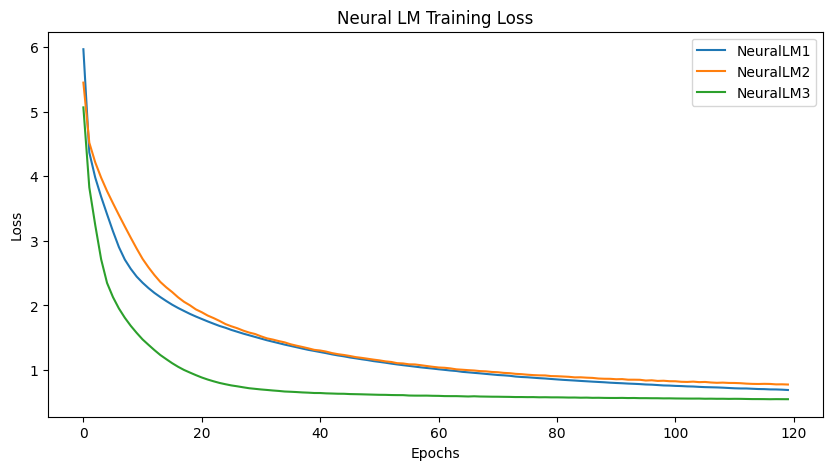

In [72]:
# Load tokenized data
with open("tokenized_data.json", "r", encoding="utf-8") as f:
    corpus = json.load(f)

# Hyperparameters
context_size = 4
embedding_dim = 50
batch_size = 1024
epochs = 120
learning_rate = 0.002

# Create dataset and dataloader
dataset = NeuralLMDataset(corpus, word_to_idx, context_size)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize models
models = {
    "NeuralLM1": NeuralLM1(len(vocab), embedding_dim, context_size),
    "NeuralLM2": NeuralLM2(len(vocab), embedding_dim, context_size),
    "NeuralLM3": NeuralLM3(len(vocab), embedding_dim, context_size),
}

# Train all models and plot loss curves
plt.figure(figsize=(10, 5))
for name, model in models.items():
    print(f"Training {name}...")
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()
    losses = train_neural_lm(model, dataloader, criterion, optimizer, epochs)

    # Plot losses
    plt.plot(losses, label=name)

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Neural LM Training Loss")
plt.legend()
plt.show()


In [73]:
def compute_accuracy(model, dataloader):
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for context, target in dataloader:
            context, target = context.long(), target.long()
            output = model(context)
            predicted = torch.argmax(output, dim=1)  # Get index of highest probability
            correct += (predicted == target).sum().item()
            total += target.size(0)

    accuracy = correct / total
    return accuracy

import math

def compute_perplexity(model, dataloader, criterion):
    model.eval()
    total_loss = 0
    total_samples = 0

    with torch.no_grad():
        for context, target in dataloader:
            context, target = context.long(), target.long()
            output = model(context)
            loss = criterion(output, target)
            total_loss += loss.item() * target.size(0)  # Multiply by batch size
            total_samples += target.size(0)

    avg_loss = total_loss / total_samples
    perplexity = math.exp(avg_loss)
    return perplexity


In [74]:
criterion = nn.CrossEntropyLoss()

for name, model in models.items():
    print(f"Evaluating {name}...")

    acc = compute_accuracy(model, dataloader)
    ppl = compute_perplexity(model, dataloader, criterion)

    print(f"{name} - Accuracy: {acc * 100:.2f}% | Perplexity: {ppl:.2f}")


Evaluating NeuralLM1...
NeuralLM1 - Accuracy: 84.23% | Perplexity: 1.85
Evaluating NeuralLM2...
NeuralLM2 - Accuracy: 85.66% | Perplexity: 1.69
Evaluating NeuralLM3...
NeuralLM3 - Accuracy: 86.02% | Perplexity: 1.62


In [75]:
def predict_next_tokens(model, sentence, word_to_idx, idx_to_word, context_size=4, top_k=1):
    model.eval()
    tokens = sentence.strip().split()  # Simple tokenization (split by space)

    # Ensure the sentence has at least 'context_size' words
    if len(tokens) < context_size:
        print(f"Skipping: '{sentence}' (not enough context words)")
        return []

    # Get the last 'context_size' tokens
    context = tokens[-context_size:]
    
    predicted_words = []
    
    for _ in range(3):  # Predict three tokens
        if all(word in word_to_idx for word in context):
            context_indices = torch.tensor([word_to_idx[word] for word in context], dtype=torch.long).unsqueeze(0)
            output = model(context_indices)  # Get predictions
            
            # Select the top prediction
            predicted_idx = torch.argmax(output, dim=1).item()
            predicted_word = idx_to_word[predicted_idx]

            predicted_words.append(predicted_word)
            context.append(predicted_word)  # Update context with predicted word
            context.pop(0)  # Maintain context size
        else:
            print(f"Unknown words encountered in: '{sentence}'")
            break

    return predicted_words


In [76]:
# Load test sentences
test_file = "sample_test.txt"
with open(test_file, "r", encoding="utf-8") as f:
    test_sentences = [line.strip() for line in f]

# Select a trained model (e.g., NeuralLM3 as it's the best-performing one)
best_model = models["NeuralLM3"]

# Make predictions for each sentence
predictions = {}
for sentence in test_sentences:
    predictions[sentence] = predict_next_tokens(best_model, sentence, word_to_idx, idx_to_word)

# Print results
for sentence, predicted in predictions.items():
    print(f"Input: {sentence}")
    print(f"Predicted: {' '.join(predicted)}\n")


Unknown words encountered in: 'i felt like earlier this year i was starting to feel emotional that it'
Unknown words encountered in: 'i do need constant reminders when i go through lulls in feeling submiss'
Unknown words encountered in: 'i am feeling unhappy and weird'
Input: i felt like earlier this year i was starting to feel emotional that it
Predicted: 

Input: i do need constant reminders when i go through lulls in feeling submiss
Predicted: 

Input: i was really feeling crappy even after my awesome
Predicted: w ##e ##e

Input: i finally realise the feeling of being hated and its after effects are
Predicted: so big sw

Input: i am feeling unhappy and weird
Predicted: 

